# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [67]:
# insert code here
distribution = results['actual'].value_counts(normalize=True)
print(distribution)


actual
1.0    0.6
0.0    0.4
Name: proportion, dtype: float64


I think a 60/40 split (1.0 = 60%, 0.0 = 40%) is not extremely imbalanced, but it is a mild imbalance. 
Whether there should be a concern depends on:
1. whether it impacts on Model Performance.
2. Since imbalance might impact Evaluation Metrics – eg. Accuracy. Instead, using precision, recall, F1-score, or AUC-ROC can provide better insights into model effectiveness.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

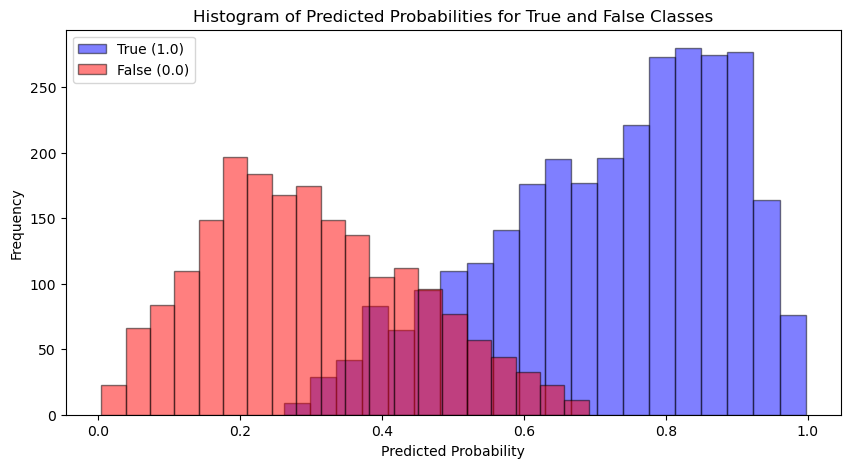

In [70]:
# insert code here

# Separate probabilities based on actual class
true_probs = results[results['actual'] == 1.0]['prob']
false_probs = results[results['actual'] == 0.0]['prob']

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(true_probs, bins=20, alpha=0.5, label='True (1.0)', color='blue', edgecolor='black')
plt.hist(false_probs, bins=20, alpha=0.5, label='False (0.0)', color='red', edgecolor='black')

# Labels and legend
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities for True and False Classes')
plt.legend()
plt.show()


I observed that most of the false class probabilities are in the range of 0 to 0.5, while most of the true class probabilities are in the range of 0.5 to 1.0. But there is an overlap of the red (False 0.0 class) and blue (True 1.0 class) in the probability range of 0.3-0.7, which indicates that the model may have uncertainty in this region.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [73]:
# insert code here

# Set threshold at 0.5
results['predicted'] = (results['prob'] >= 0.5).astype(int)

# Create confusion matrix manually
tp = ((results['predicted'] == 1) & (results['actual'] == 1)).sum()  # True Positive
tn = ((results['predicted'] == 0) & (results['actual'] == 0)).sum()  # True Negative
fp = ((results['predicted'] == 1) & (results['actual'] == 0)).sum()  # False Positive
fn = ((results['predicted'] == 0) & (results['actual'] == 1)).sum()  # False Negative

# Print confusion matrix
print("Confusion Matrix:")
print(f"TP: {tp}, FP: {fp}")
print(f"FN: {fn}, TN: {tn}")


Confusion Matrix:
TP: 2623, FP: 210
FN: 377, TN: 1790


Observations:
True Positives (TP = 2623)
False Positives (FP = 210)
False Negatives (FN = 377)
True Negatives (TN = 1790)

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [76]:
# insert code here
# Confusion matrix values
TP = 2623
FP = 210
FN = 377
TN = 1790

# Accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))


Accuracy: 0.8826
Precision: 0.9259
Recall: 0.8743


Since the classification is mildly inbalanced, I will not choose Accuracy as my measure. Which metric to prioritize? It depends.
If the impact of False Negatives (FN) is high, then I will focus on recall metric. If the impact of False Positives (FP) is high, then I will prioritize precision. 

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

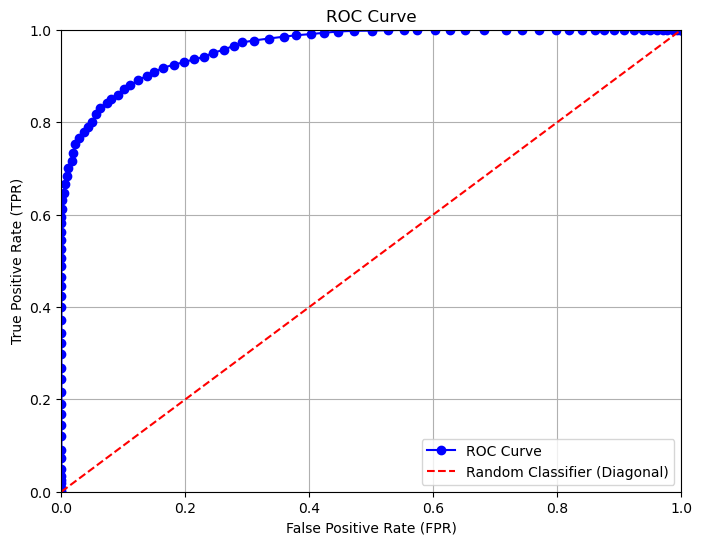

AUC: 0.962665


In [79]:
# Extract 'actual' (true labels) and 'prob' (predicted probabilities)
y_true = results['actual'].values
y_probs = results['prob'].values

# Function to calculate confusion matrix components for a given threshold
def confusion_matrix_components(threshold):
    predicted = (y_probs >= threshold).astype(int)
    TP = np.sum((predicted == 1) & (y_true == 1))
    FP = np.sum((predicted == 1) & (y_true == 0))
    FN = np.sum((predicted == 0) & (y_true == 1))
    TN = np.sum((predicted == 0) & (y_true == 0))
    return TP, FP, FN, TN

# Lists to store TPR (recall) and FPR values for each threshold
tpr_list = []
fpr_list = []

# Iterate through various thresholds from 0.0 to 1.0
thresholds = np.linspace(0, 1, 100)  # 100 threshold values between 0 and 1

for threshold in thresholds:
    TP, FP, FN, TN = confusion_matrix_components(threshold)
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # Handle division by zero
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # Handle division by zero
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    
# Ensure FPR and TPR are sorted in increasing order of FPR
fpr_list, tpr_list = zip(*sorted(zip(fpr_list, tpr_list)))

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, marker='o', color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier (Diagonal)')

# Add labels and title
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.legend(loc='best')

# Show the plot
plt.show()

# np.trapz to calculate AUC
auc = np.trapz(tpr_list, fpr_list)
print("AUC:", auc)

The ROC curve for this model shows a good fit, as the curve is far from the diagonal, indicating that the model is effectively distinguishing between True and False classes. Meanwhile, the AUC is 0.96 (above 0.8), suggesting that the model performs well in identifying positive instances with a low false positive rate. 